In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [3]:
def get_filename(base_name, seed):
    return base_name + '-seed' + str(seed) + '.npy'

def get_mean_mtx(base_name, max_seed):
    cum = np.load(get_filename(base_name, 1))

    if max_seed > 1:
        for seed in range(2, max_seed+1):
            cum += np.load(get_filename(base_name, seed))
    
    return cum / max_seed

In [4]:
results_folder_path = './results/3_seeds_exp/'

# Report

In [5]:
vector_imgs_path = './vector_imgs/report/'

## Split MNIST

#### Original article SplitMNIST stuff

In [6]:
MAX_SEED = 3

# Just VCL
split_vcl = get_mean_mtx(results_folder_path+'VCL-split', MAX_SEED)
# Just VCL + VGR
split_vcl_vgr = get_mean_mtx(results_folder_path+'VCL-split-with-VGR', MAX_SEED)

# VCL + Random Coreset
split_vcl_randCore = get_mean_mtx(results_folder_path+'VCL-all-split-randcoreset', MAX_SEED)
# VCL + Random Coreset + VGR
split_vcl_randCore_vgr = get_mean_mtx(results_folder_path+'VCL-all-split-randcoreset-VGR', MAX_SEED)

# VCL + Kcenter Coreset
split_vcl_kcen = get_mean_mtx(results_folder_path+'VCL-all-split-kCenterCoreset', MAX_SEED)
# VCL + Kcenter Coreset + VGR
split_vcl_kcen_vgr = get_mean_mtx(results_folder_path+'VCL-all-split-kCenterCoreset-VGR', MAX_SEED)

# Coreset only
split_only_rand_core = get_mean_mtx(results_folder_path+'rand-coreset-only-split', MAX_SEED)

# Kcenter only
split_only_kcen_core = get_mean_mtx(results_folder_path+'kcen-coreset-only-split', MAX_SEED)

In [7]:
split_vcl_vals = np.nanmean(split_vcl, axis=1)
split_vcl_vgr_vals = np.nanmean(split_vcl_vgr, axis=1)
split_vcl_randCore_vals = np.nanmean(split_vcl_randCore, axis=1)
split_vcl_randCore_vgr_vals = np.nanmean(split_vcl_randCore_vgr, axis=1)
split_vcl_kcen_vals = np.nanmean(split_vcl_kcen, axis=1)
split_vcl_kcen_vgr_vals = np.nanmean(split_vcl_kcen_vgr, axis=1)
split_only_rand_core_vals = np.nanmean(split_only_rand_core, axis=1)
split_only_kcen_core_vals = np.nanmean(split_only_kcen_core, axis=1)

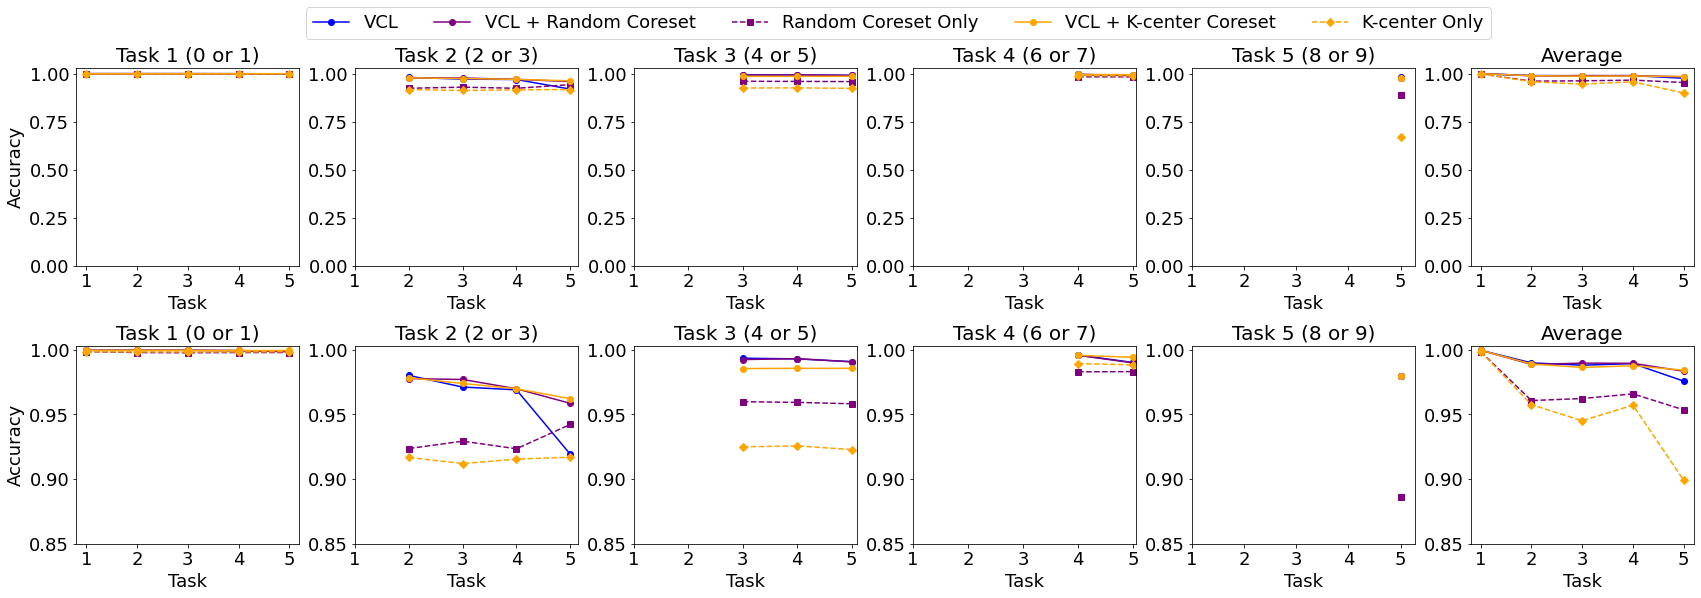

In [8]:
NROWS = 2
NCOLS = 6
fig, ax = plt.subplots(NROWS, NCOLS, figsize=(24,8))

for i in range(NROWS):
    for idx in range(NCOLS-1): # -1 because of 'average plot' not included
        ax[i,idx].plot(range(1+idx,len(split_vcl[:,idx])+1), split_vcl[idx:,idx], '-o', label='VCL', color='blue')
        ax[i,idx].plot(range(1+idx,len(split_vcl_randCore[:,idx])+1), split_vcl_randCore[idx:,idx], '-o', label='VCL + Random Coreset', color='purple')
        ax[i,idx].plot(range(1+idx,len(split_only_rand_core[:,idx])+1), split_only_rand_core[idx:,idx], '--s', label='Random Coreset Only', color='purple')
        ax[i,idx].plot(range(1+idx,len(split_vcl_kcen[:,idx])+1), split_vcl_kcen[idx:,idx], '-o', label='VCL + K-center Coreset', color='orange')
        ax[i,idx].plot(range(1+idx,len(split_only_kcen_core[:,idx])+1), split_only_kcen_core[idx:,idx], '--D', label='K-center Only', color='orange')
        ax[i,idx].set_xlabel("Task", fontsize=18)
        ax[i,idx].set_title("Task "+str(idx+1)+" ("+str(2*idx)+" or "+str(2*idx+1)+")", fontsize=20)

for i in range(NROWS):
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
    ax[i,NCOLS-1].plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
    ax[i,NCOLS-1].plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
    ax[i,NCOLS-1].plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='orange')
    ax[i,NCOLS-1].set_xlabel("Task", fontsize=18)
    ax[i,NCOLS-1].set_title("Average", fontsize=20)

ax[0,0].set_ylabel("Accuracy", fontsize=18)
ax[1,0].set_ylabel("Accuracy", fontsize=18)

fig.tight_layout(pad=2)

for j in range(6):
    ax[0,j].set_ylim(0, 1.03)
    ax[0,j].set_xticks(np.arange(1, 6, 1.0))
    ax[0,j].tick_params(labelsize=18)

for j in range(6):
    ax[1,j].set_ylim(0.85, 1.003)
    ax[1,j].set_xticks(np.arange(1, 6, 1.0))
    ax[1,j].tick_params(labelsize=18)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines = lines_labels[0][0]
labels = lines_labels[0][1]

fig.legend(lines, labels, bbox_to_anchor= (0.18, 1.05), ncol=6, loc="upper left", prop={'size': 18})

plt.savefig(vector_imgs_path+"testset_SplitMNIST.png", format='png', dpi=300)
plt.show()

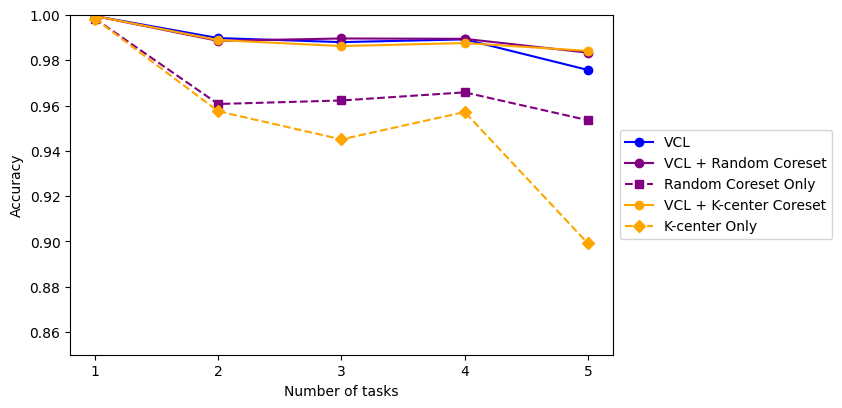

In [9]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
plt.plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
plt.plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='orange')

plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"average_SplitMNIST.svg", format = 'svg', dpi=300)
plt.show()

#### VGR

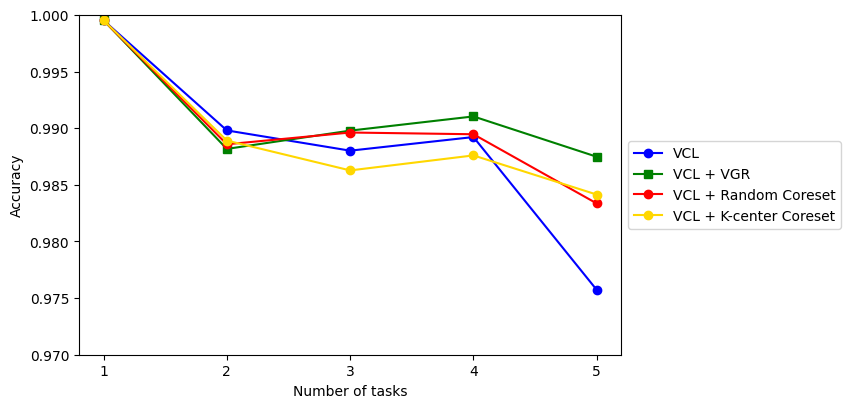

In [11]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(split_vcl_vgr_vals)+1), split_vcl_vgr_vals, '-s', label='VCL + VGR', color='green')
plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='red')
# plt.plot(range(1,len(split_vcl_randCore_vgr_vals)+1), split_vcl_randCore_vgr_vals, '-s', label='VCL + Random Coreset + VGR', color='black')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='gold')
# plt.plot(range(1,len(split_vcl_kcen_vgr_vals)+1), split_vcl_kcen_vgr_vals, '-s', label='VCL + K-center Coreset + VGR', color='purple')

plt.ylim(0.97, 1)
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"vgr_SplitMNIST.svg", format = 'svg', dpi=300)
plt.show()

#### CNNs

In [12]:
MAX_SEED = 3

# CNN using VCL
split_vcl_cnn = get_mean_mtx(results_folder_path+'VCL-split-CNN', MAX_SEED)

# CNN using VCL and a random coreset
split_vcl_cnn_randCore = get_mean_mtx(results_folder_path+'VCL-split-CNN-randCoreset', MAX_SEED)

# CNN using VCL and a K-center coreset
split_vcl_cnn_kcen = get_mean_mtx(results_folder_path+'VCL-split-CNN-kCenterCoreset', MAX_SEED)

In [13]:
split_vcl_cnn_vals = np.nanmean(split_vcl_cnn, axis=1)
split_vcl_cnn_randCore_vals = np.nanmean(split_vcl_cnn_randCore, axis=1)
split_vcl_cnn_kcen_vals = np.nanmean(split_vcl_cnn_kcen, axis=1)

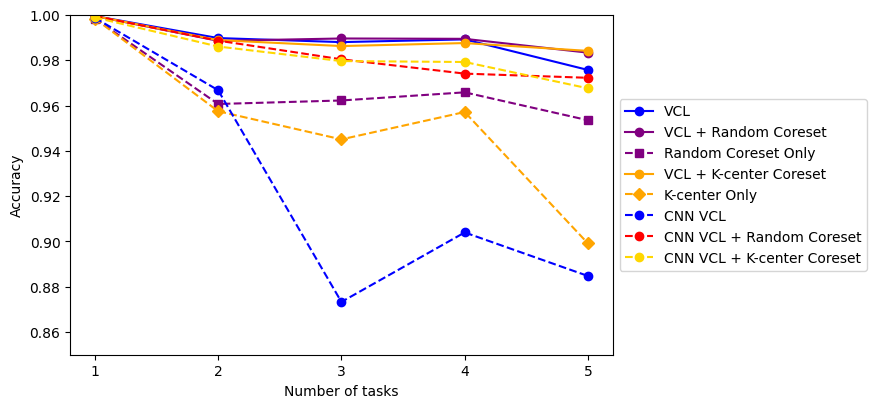

In [14]:
figure(figsize=(7, 4.5), dpi=100)

plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
plt.plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
plt.plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='orange')
plt.plot(range(1,len(split_vcl_cnn_vals)+1), split_vcl_cnn_vals, '--o', label='CNN VCL', color='blue')
plt.plot(range(1,len(split_vcl_cnn_randCore_vals)+1), split_vcl_cnn_randCore_vals, '--o', label='CNN VCL + Random Coreset', color='red')
plt.plot(range(1,len(split_vcl_cnn_kcen_vals)+1), split_vcl_cnn_kcen_vals, '--o', label='CNN VCL + K-center Coreset', color='gold')

plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"average_SplitMNIST.svg", format = 'svg', dpi=300)
plt.show()

## Permuted MNIST

#### Original article PerminutedMNIST stuff

In [15]:
MAX_SEED = 3

# Just VCL
perm_vcl = get_mean_mtx(results_folder_path+'VCL', MAX_SEED)

# VCL + Random Coreset
perm_vcl_randCore_200 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-200', MAX_SEED)
perm_vcl_randCore_400 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-400', MAX_SEED)
perm_vcl_randCore_1000 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-1000', MAX_SEED)
perm_vcl_randCore_2500 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-2500', MAX_SEED)
perm_vcl_randCore_5000 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-5000', MAX_SEED)

# VCL + Random Coreset + VGR
perm_vcl_vgr_randCore_200 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-200', MAX_SEED)
perm_vcl_vgr_randCore_400 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-400', MAX_SEED)
perm_vcl_vgr_randCore_1000 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-1000', MAX_SEED)
perm_vcl_vgr_randCore_2500 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-2500', MAX_SEED)
perm_vcl_vgr_randCore_5000 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-5000', MAX_SEED)

# VCL + Kcenter Coreset
perm_vcl_kcen = get_mean_mtx(results_folder_path+'kcen-VCL200', MAX_SEED)

# Coreset only
perm_only_core_200 = get_mean_mtx(results_folder_path+'only-coreset-200', MAX_SEED)
perm_only_core_400 = get_mean_mtx(results_folder_path+'only-coreset-400', MAX_SEED)
perm_only_core_1000 = get_mean_mtx(results_folder_path+'only-coreset-1000', MAX_SEED)
perm_only_core_2500 = get_mean_mtx(results_folder_path+'only-coreset-2500', MAX_SEED)
perm_only_core_5000 = get_mean_mtx(results_folder_path+'only-coreset-5000', MAX_SEED)

# Kcenter only
perm_kcen_coreset_only = get_mean_mtx(results_folder_path+'kcen-coreset-only200', MAX_SEED)

In [16]:
perm_vcl_vals = np.nanmean(perm_vcl, axis=1)

perm_vcl_randCore_200_vals = np.nanmean(perm_vcl_randCore_200, axis=1)
perm_vcl_randCore_400_vals = np.nanmean(perm_vcl_randCore_400, axis=1)
perm_vcl_randCore_1000_vals = np.nanmean(perm_vcl_randCore_1000, axis=1)
perm_vcl_randCore_2500_vals = np.nanmean(perm_vcl_randCore_2500, axis=1)
perm_vcl_randCore_5000_vals = np.nanmean(perm_vcl_randCore_5000, axis=1)

perm_vcl_vgr_randCore_200_vals = np.nanmean(perm_vcl_vgr_randCore_200, axis=1)
perm_vcl_vgr_randCore_400_vals = np.nanmean(perm_vcl_vgr_randCore_400, axis=1)
perm_vcl_vgr_randCore_1000_vals = np.nanmean(perm_vcl_vgr_randCore_1000, axis=1)
perm_vcl_vgr_randCore_2500_vals = np.nanmean(perm_vcl_vgr_randCore_2500, axis=1)
perm_vcl_vgr_randCore_5000_vals = np.nanmean(perm_vcl_vgr_randCore_5000, axis=1)

perm_vcl_kcen_vals = np.nanmean(perm_vcl_kcen, axis=1)

perm_only_core_200_vals = np.nanmean(perm_only_core_200, axis=1)
perm_only_core_400_vals = np.nanmean(perm_only_core_400, axis=1)
perm_only_core_1000_vals = np.nanmean(perm_only_core_1000, axis=1)
perm_only_core_2500_vals = np.nanmean(perm_only_core_2500, axis=1)
perm_only_core_5000_vals = np.nanmean(perm_only_core_5000, axis=1)

perm_kcen_coreset_only_vals = np.nanmean(perm_kcen_coreset_only, axis=1)


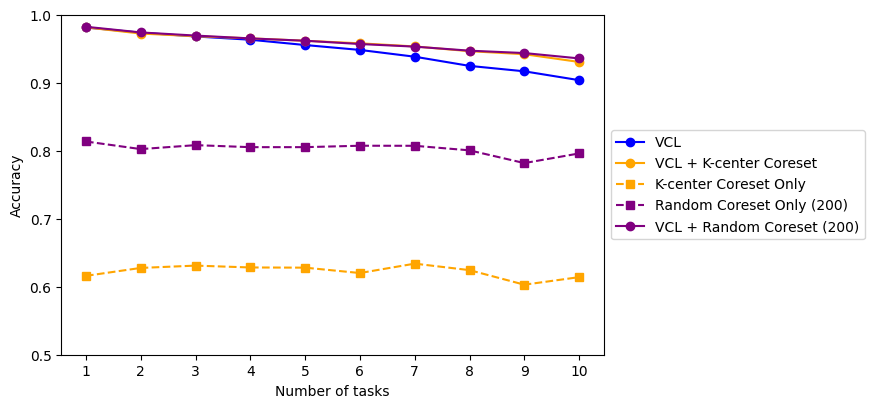

In [17]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-o', label='VCL', color='blue')
plt.plot(range(1,len(perm_vcl_kcen_vals)+1), perm_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
plt.plot(range(1,len(perm_kcen_coreset_only_vals)+1), perm_kcen_coreset_only_vals, '--s', label='K-center Coreset Only', color='orange')
plt.plot(range(1,len(perm_only_core_200_vals)+1), perm_only_core_200_vals, '--s', label='Random Coreset Only (200)', color='purple')
plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + Random Coreset (200)', color='purple')

plt.ylim(0.5, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"testset_PermutedMNIST.svg", format = 'svg', dpi=300)
plt.show()

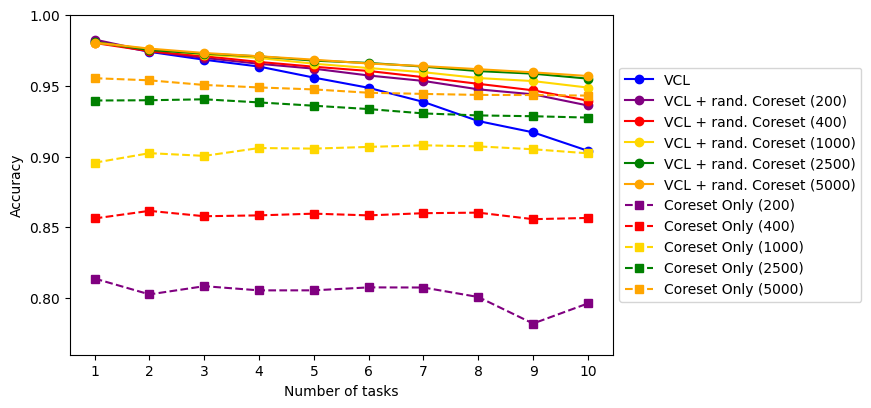

In [18]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-o', label='VCL', color='blue')

plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + rand. Coreset (200)', color='purple')
plt.plot(range(1,len(perm_vcl_randCore_400_vals)+1), perm_vcl_randCore_400_vals, '-o', label='VCL + rand. Coreset (400)', color='red')
plt.plot(range(1,len(perm_vcl_randCore_1000_vals)+1), perm_vcl_randCore_1000_vals, '-o', label='VCL + rand. Coreset (1000)', color='gold')
plt.plot(range(1,len(perm_vcl_randCore_2500_vals)+1), perm_vcl_randCore_2500_vals, '-o', label='VCL + rand. Coreset (2500)', color='green')
plt.plot(range(1,len(perm_vcl_randCore_5000_vals)+1), perm_vcl_randCore_5000_vals, '-o', label='VCL + rand. Coreset (5000)', color='orange')

plt.plot(range(1,len(perm_only_core_200_vals)+1), perm_only_core_200_vals, '--s', label='Coreset Only (200)', color='purple')
plt.plot(range(1,len(perm_only_core_400_vals)+1), perm_only_core_400_vals, '--s', label='Coreset Only (400)', color='red')
plt.plot(range(1,len(perm_only_core_1000_vals)+1), perm_only_core_1000_vals, '--s', label='Coreset Only (1000)', color='gold')
plt.plot(range(1,len(perm_only_core_2500_vals)+1), perm_only_core_2500_vals, '--s', label='Coreset Only (2500)', color='green')
plt.plot(range(1,len(perm_only_core_5000_vals)+1), perm_only_core_5000_vals, '--s', label='Coreset Only (5000)', color='orange')


plt.ylim(0.76, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"coreset_PermutedMNIST.svg", format = 'svg', dpi=300)
plt.show()

#### VGR

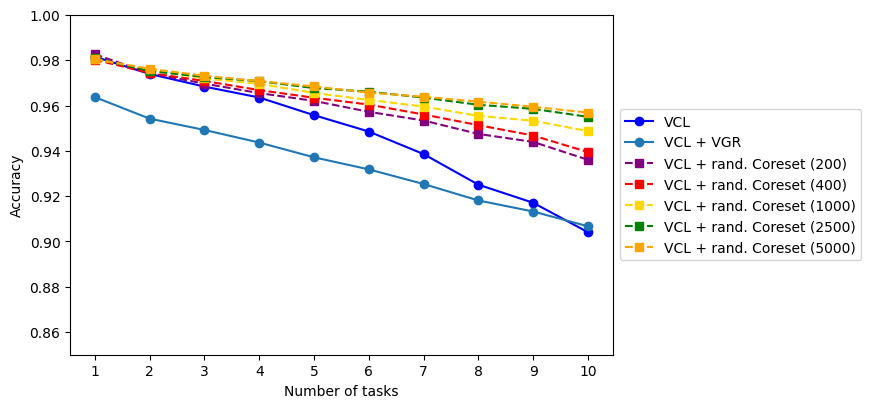

In [24]:
figure(figsize=(7, 4.5), dpi=100)

plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-o', label='VCL', color='blue')

plt.plot(range(1,len(perm_vcl_vgr_randCore_200_vals)+1), perm_vcl_vgr_randCore_200_vals, '-o', label='VCL + VGR')
# plt.plot(range(1,len(perm_vcl_vgr_randCore_400_vals)+1), perm_vcl_vgr_randCore_400_vals, '-o', label='VCL + rand. Coreset (400) + VGR', color='red')
# plt.plot(range(1,len(perm_vcl_vgr_randCore_1000_vals)+1), perm_vcl_vgr_randCore_1000_vals, '-o', label='VCL + rand. Coreset (1000) + VGR', color='gold')
# plt.plot(range(1,len(perm_vcl_vgr_randCore_2500_vals)+1), perm_vcl_vgr_randCore_2500_vals, '-o', label='VCL + rand. Coreset (2500) + VGR', color='green')
# plt.plot(range(1,len(perm_vcl_vgr_randCore_5000_vals)+1), perm_vcl_vgr_randCore_5000_vals, '-o', label='VCL + rand. Coreset (5000) + VGR', color='orange')

plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '--s', label='VCL + rand. Coreset (200)', color='purple')
plt.plot(range(1,len(perm_vcl_randCore_400_vals)+1), perm_vcl_randCore_400_vals, '--s', label='VCL + rand. Coreset (400)', color='red')
plt.plot(range(1,len(perm_vcl_randCore_1000_vals)+1), perm_vcl_randCore_1000_vals, '--s', label='VCL + rand. Coreset (1000)', color='gold')
plt.plot(range(1,len(perm_vcl_randCore_2500_vals)+1), perm_vcl_randCore_2500_vals, '--s', label='VCL + rand. Coreset (2500)', color='green')
plt.plot(range(1,len(perm_vcl_randCore_5000_vals)+1), perm_vcl_randCore_5000_vals, '--s', label='VCL + rand. Coreset (5000)', color='orange')

plt.ylim(0.85, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(bbox_to_anchor=(1,0.5), loc="center left")
plt.savefig(vector_imgs_path+"vgr_PermutedMNIST.svg", format = 'svg', dpi=300)
plt.show()

# Poster

In [47]:
import seaborn as sn

sn.set_theme()

In [48]:
vector_imgs_path = './vector_imgs/poster/'

In [49]:
turq_color = '#4BACC6'

## Split MNIST

#### Original article stuff + VGR

In [50]:
MAX_SEED = 3

# Just VCL
split_vcl = get_mean_mtx(results_folder_path+'VCL-split', MAX_SEED)
# Just VCL + VGR
split_vcl_vgr = get_mean_mtx(results_folder_path+'VCL-split-with-VGR', MAX_SEED)

# VCL + Random Coreset
split_vcl_randCore = get_mean_mtx(results_folder_path+'VCL-all-split-randcoreset', MAX_SEED)
# VCL + Random Coreset + VGR
split_vcl_randCore_vgr = get_mean_mtx(results_folder_path+'VCL-all-split-randcoreset-VGR', MAX_SEED)

# VCL + Kcenter Coreset
split_vcl_kcen = get_mean_mtx(results_folder_path+'VCL-all-split-kCenterCoreset', MAX_SEED)
# VCL + Kcenter Coreset + VGR
split_vcl_kcen_vgr = get_mean_mtx(results_folder_path+'VCL-all-split-kCenterCoreset-VGR', MAX_SEED)

# Coreset only
split_only_rand_core = get_mean_mtx(results_folder_path+'rand-coreset-only-split', MAX_SEED)

# Kcenter only
split_only_kcen_core = get_mean_mtx(results_folder_path+'kcen-coreset-only-split', MAX_SEED)

split_vcl_vals = np.nanmean(split_vcl, axis=1)
split_vcl_vgr_vals = np.nanmean(split_vcl_vgr, axis=1)
split_vcl_randCore_vals = np.nanmean(split_vcl_randCore, axis=1)
split_vcl_randCore_vgr_vals = np.nanmean(split_vcl_randCore_vgr, axis=1)
split_vcl_kcen_vals = np.nanmean(split_vcl_kcen, axis=1)
split_vcl_kcen_vgr_vals = np.nanmean(split_vcl_kcen_vgr, axis=1)
split_only_rand_core_vals = np.nanmean(split_only_rand_core, axis=1)
split_only_kcen_core_vals = np.nanmean(split_only_kcen_core, axis=1)

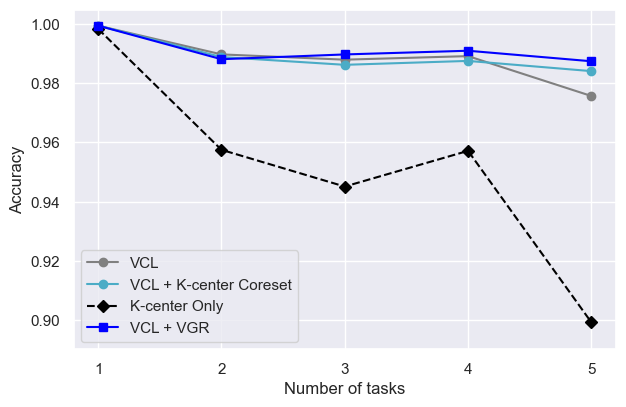

In [51]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='grey')
# plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
# plt.plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color=turq_color)
plt.plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='black')
plt.plot(range(1,len(split_vcl_vgr_vals)+1), split_vcl_vgr_vals, '-s', label='VCL + VGR', color='blue')

plt.ylim(0.89, 1.005)
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.savefig(vector_imgs_path+"average_SplitMNIST.png", format = 'png', dpi=300)
plt.show()

#### CNNs

In [52]:
MAX_SEED = 3

# CNN using VCL
split_vcl_cnn = get_mean_mtx(results_folder_path+'VCL-split-CNN', MAX_SEED)
# CNN using VCL and a random coreset
split_vcl_cnn_randCore = get_mean_mtx(results_folder_path+'VCL-split-CNN-randCoreset', MAX_SEED)
# CNN using VCL and a K-center coreset
split_vcl_cnn_kcen = get_mean_mtx(results_folder_path+'VCL-split-CNN-kCenterCoreset', MAX_SEED)

split_vcl_cnn_vals = np.nanmean(split_vcl_cnn, axis=1)
split_vcl_cnn_randCore_vals = np.nanmean(split_vcl_cnn_randCore, axis=1)
split_vcl_cnn_kcen_vals = np.nanmean(split_vcl_cnn_kcen, axis=1)

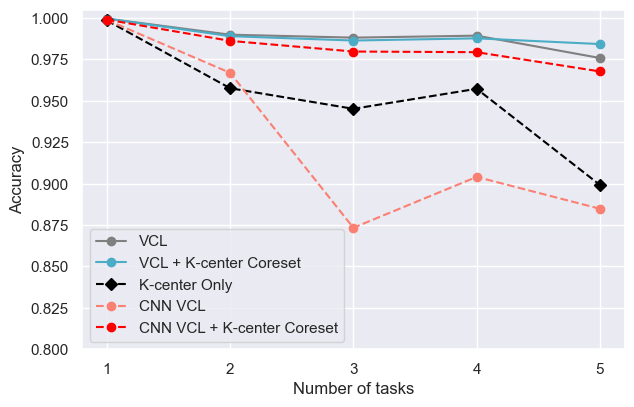

In [53]:
figure(figsize=(7, 4.5), dpi=100)

plt.plot(range(1,len(split_vcl_vals)+1), split_vcl_vals, '-o', label='VCL', color='grey')
# plt.plot(range(1,len(split_vcl_randCore_vals)+1), split_vcl_randCore_vals, '-o', label='VCL + Random Coreset', color='purple')
# plt.plot(range(1,len(split_only_rand_core_vals)+1), split_only_rand_core_vals, '--s', label='Random Coreset Only', color='purple')
plt.plot(range(1,len(split_vcl_kcen_vals)+1), split_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color=turq_color)
plt.plot(range(1,len(split_only_kcen_core_vals)+1), split_only_kcen_core_vals, '--D', label='K-center Only', color='black')
plt.plot(range(1,len(split_vcl_cnn_vals)+1), split_vcl_cnn_vals, '--o', label='CNN VCL', color='salmon')
# plt.plot(range(1,len(split_vcl_cnn_randCore_vals)+1), split_vcl_cnn_randCore_vals, '--o', label='CNN VCL + Random Coreset', color='red')
plt.plot(range(1,len(split_vcl_cnn_kcen_vals)+1), split_vcl_cnn_kcen_vals, '--o', label='CNN VCL + K-center Coreset', color='red')

plt.ylim(0.8, 1.005)
plt.xticks(np.arange(1, 6, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.savefig(vector_imgs_path+"average+cnn_SplitMNIST.png", format = 'png', dpi=300)
plt.show()

## Permuted MNIST

#### Original article stuff

In [54]:
MAX_SEED = 3

# Just VCL
perm_vcl = get_mean_mtx(results_folder_path+'VCL', MAX_SEED)

# VCL + Random Coreset
perm_vcl_randCore_200 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-200', MAX_SEED)
perm_vcl_randCore_400 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-400', MAX_SEED)
perm_vcl_randCore_1000 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-1000', MAX_SEED)
perm_vcl_randCore_2500 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-2500', MAX_SEED)
perm_vcl_randCore_5000 = get_mean_mtx(results_folder_path+'rand-VCL-nonVGR-5000', MAX_SEED)

# VCL + Random Coreset + VGR
perm_vcl_vgr_randCore_200 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-200', MAX_SEED)
perm_vcl_vgr_randCore_400 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-400', MAX_SEED)
perm_vcl_vgr_randCore_1000 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-1000', MAX_SEED)
perm_vcl_vgr_randCore_2500 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-2500', MAX_SEED)
perm_vcl_vgr_randCore_5000 = get_mean_mtx(results_folder_path+'rand-VCL-VGR-5000', MAX_SEED)

# VCL + Kcenter Coreset
perm_vcl_kcen = get_mean_mtx(results_folder_path+'kcen-VCL200', MAX_SEED)

# Coreset only
perm_only_core_200 = get_mean_mtx(results_folder_path+'only-coreset-200', MAX_SEED)
perm_only_core_400 = get_mean_mtx(results_folder_path+'only-coreset-400', MAX_SEED)
perm_only_core_1000 = get_mean_mtx(results_folder_path+'only-coreset-1000', MAX_SEED)
perm_only_core_2500 = get_mean_mtx(results_folder_path+'only-coreset-2500', MAX_SEED)
perm_only_core_5000 = get_mean_mtx(results_folder_path+'only-coreset-5000', MAX_SEED)

# Kcenter only
perm_kcen_coreset_only = get_mean_mtx(results_folder_path+'kcen-coreset-only200', MAX_SEED)


perm_vcl_vals = np.nanmean(perm_vcl, axis=1)

perm_vcl_randCore_200_vals = np.nanmean(perm_vcl_randCore_200, axis=1)
perm_vcl_randCore_400_vals = np.nanmean(perm_vcl_randCore_400, axis=1)
perm_vcl_randCore_1000_vals = np.nanmean(perm_vcl_randCore_1000, axis=1)
perm_vcl_randCore_2500_vals = np.nanmean(perm_vcl_randCore_2500, axis=1)
perm_vcl_randCore_5000_vals = np.nanmean(perm_vcl_randCore_5000, axis=1)

perm_vcl_vgr_randCore_200_vals = np.nanmean(perm_vcl_vgr_randCore_200, axis=1)
perm_vcl_vgr_randCore_400_vals = np.nanmean(perm_vcl_vgr_randCore_400, axis=1)
perm_vcl_vgr_randCore_1000_vals = np.nanmean(perm_vcl_vgr_randCore_1000, axis=1)
perm_vcl_vgr_randCore_2500_vals = np.nanmean(perm_vcl_vgr_randCore_2500, axis=1)
perm_vcl_vgr_randCore_5000_vals = np.nanmean(perm_vcl_vgr_randCore_5000, axis=1)

perm_vcl_kcen_vals = np.nanmean(perm_vcl_kcen, axis=1)

perm_only_core_200_vals = np.nanmean(perm_only_core_200, axis=1)
perm_only_core_400_vals = np.nanmean(perm_only_core_400, axis=1)
perm_only_core_1000_vals = np.nanmean(perm_only_core_1000, axis=1)
perm_only_core_2500_vals = np.nanmean(perm_only_core_2500, axis=1)
perm_only_core_5000_vals = np.nanmean(perm_only_core_5000, axis=1)

perm_kcen_coreset_only_vals = np.nanmean(perm_kcen_coreset_only, axis=1)

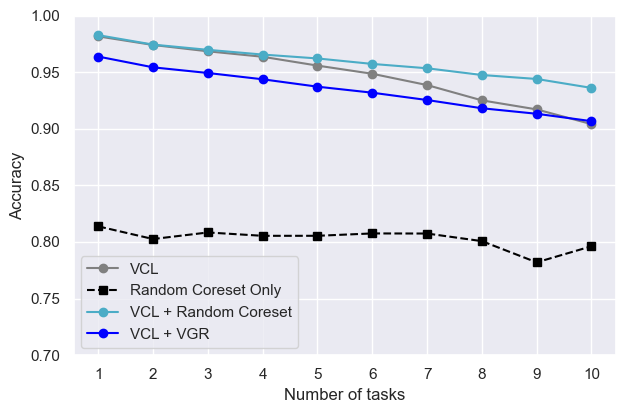

In [55]:
figure(figsize=(7, 4.5), dpi=100)
plt.plot(range(1,len(perm_vcl_vals)+1), perm_vcl_vals, '-o', label='VCL', color='grey')
# plt.plot(range(1,len(perm_vcl_kcen_vals)+1), perm_vcl_kcen_vals, '-o', label='VCL + K-center Coreset', color='orange')
# plt.plot(range(1,len(perm_kcen_coreset_only_vals)+1), perm_kcen_coreset_only_vals, '--s', label='K-center Coreset Only', color='orange')
plt.plot(range(1,len(perm_only_core_200_vals)+1), perm_only_core_200_vals, '--s', label='Random Coreset Only', color='black')
plt.plot(range(1,len(perm_vcl_randCore_200_vals)+1), perm_vcl_randCore_200_vals, '-o', label='VCL + Random Coreset', color=turq_color)
plt.plot(range(1,len(perm_vcl_vgr_randCore_200_vals)+1), perm_vcl_vgr_randCore_200_vals, '-o', label='VCL + VGR', color='blue')

plt.ylim(0.7, 1)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Number of tasks")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.savefig(vector_imgs_path+"testset_PermutedMNIST.png", format = 'png', dpi=300)
plt.show()

#### Comparing coreset sizes

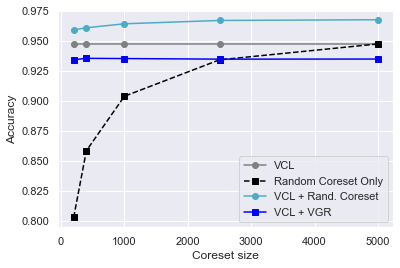

In [56]:
xx = [200, 400, 1000, 2500, 5000]

# VCL + Random Coreset + VGR
perm_vcl_vgr_randCore_means = []
perm_vcl_vgr_randCore_means.append(perm_vcl_vgr_randCore_200_vals.mean())
perm_vcl_vgr_randCore_means.append(perm_vcl_vgr_randCore_400_vals.mean())
perm_vcl_vgr_randCore_means.append(perm_vcl_vgr_randCore_1000_vals.mean())
perm_vcl_vgr_randCore_means.append(perm_vcl_vgr_randCore_2500_vals.mean())
perm_vcl_vgr_randCore_means.append(perm_vcl_vgr_randCore_5000_vals.mean())


# VCL + Random Coreset
perm_vcl_randCore_means = []
perm_vcl_randCore_means.append(perm_vcl_randCore_200_vals.mean())
perm_vcl_randCore_means.append(perm_vcl_randCore_400_vals.mean())
perm_vcl_randCore_means.append(perm_vcl_randCore_1000_vals.mean())
perm_vcl_randCore_means.append(perm_vcl_randCore_2500_vals.mean())
perm_vcl_randCore_means.append(perm_vcl_randCore_5000_vals.mean())

# Random Coreset Only
perm_randCore_means = []
perm_randCore_means.append(perm_only_core_200_vals.mean())
perm_randCore_means.append(perm_only_core_400_vals.mean())
perm_randCore_means.append(perm_only_core_1000_vals.mean())
perm_randCore_means.append(perm_only_core_2500_vals.mean())
perm_randCore_means.append(perm_only_core_5000_vals.mean())



y1 = [perm_vcl_vals.mean()] * 5

plt.plot(xx, y1, '-o', label='VCL', color='grey')

plt.plot(xx, perm_randCore_means, '--s', label='Random Coreset Only', color='black')

plt.plot(xx, perm_vcl_randCore_means, '-o', label='VCL + Rand. Coreset', color=turq_color)

plt.plot(xx, perm_vcl_vgr_randCore_means, '-s', label='VCL + VGR', color='blue')


plt.xlabel("Coreset size")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(vector_imgs_path+"coresetSize_PermutedMNIST.png", format = 'png', dpi=300)
plt.show()


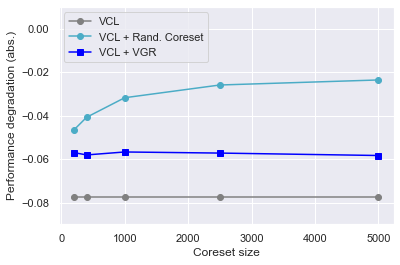

In [57]:
xx = [200, 400, 1000, 2500, 5000]

# VCL + Random Coreset + VGR
perm_vcl_vgr_randCore_y = []
perm_vcl_vgr_randCore_y.append(perm_vcl_vgr_randCore_200_vals[-1]-perm_vcl_vgr_randCore_200_vals[0])
perm_vcl_vgr_randCore_y.append(perm_vcl_vgr_randCore_400_vals[-1]-perm_vcl_vgr_randCore_400_vals[0])
perm_vcl_vgr_randCore_y.append(perm_vcl_vgr_randCore_1000_vals[-1]-perm_vcl_vgr_randCore_1000_vals[0])
perm_vcl_vgr_randCore_y.append(perm_vcl_vgr_randCore_2500_vals[-1]-perm_vcl_vgr_randCore_2500_vals[0])
perm_vcl_vgr_randCore_y.append(perm_vcl_vgr_randCore_5000_vals[-1]-perm_vcl_vgr_randCore_5000_vals[0])


# VCL + Random Coreset
perm_vcl_randCore_y = []
perm_vcl_randCore_y.append(perm_vcl_randCore_200_vals[-1]-perm_vcl_randCore_200_vals[0])
perm_vcl_randCore_y.append(perm_vcl_randCore_400_vals[-1]-perm_vcl_randCore_400_vals[0])
perm_vcl_randCore_y.append(perm_vcl_randCore_1000_vals[-1]-perm_vcl_randCore_1000_vals[0])
perm_vcl_randCore_y.append(perm_vcl_randCore_2500_vals[-1]-perm_vcl_randCore_2500_vals[0])
perm_vcl_randCore_y.append(perm_vcl_randCore_5000_vals[-1]-perm_vcl_randCore_5000_vals[0])


# Random Coreset Only
perm_randCore_y = []
perm_randCore_y.append(perm_only_core_200_vals[-1]-perm_only_core_200_vals[0])
perm_randCore_y.append(perm_only_core_400_vals[-1]-perm_only_core_400_vals[0])
perm_randCore_y.append(perm_only_core_1000_vals[-1]-perm_only_core_1000_vals[0])
perm_randCore_y.append(perm_only_core_2500_vals[-1]-perm_only_core_2500_vals[0])
perm_randCore_y.append(perm_only_core_5000_vals[-1]-perm_only_core_5000_vals[0])


y1 = [perm_vcl_vals[-1] - perm_vcl_vals[0]] * 5

plt.plot(xx, y1, '-o', label='VCL', color='grey')

# plt.plot(xx, perm_randCore_y, '--s', label='Random Coreset Only', color='black')

plt.plot(xx, perm_vcl_randCore_y, '-o', label='VCL + Rand. Coreset', color=turq_color)

plt.plot(xx, perm_vcl_vgr_randCore_y, '-s', label='VCL + VGR', color='blue')


plt.xlabel("Coreset size")
plt.ylabel("Performance degradation (abs.)")
plt.ylim(-0.09, 0.01)
plt.legend(loc='upper left')
plt.savefig(vector_imgs_path+"perfDegrad_PermutedMNIST.png", format = 'png', dpi=300)
plt.show()
